# Netflix Content Data Analysis

## Importing Required Libraries

In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [26]:
from warnings import filterwarnings
filterwarnings('ignore')

## Accessing Data

In [2]:
df=pd.read_csv('data/netflix_content.csv')

In [20]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


## Data Preprocessing

### NUll & Duplicate Value Filtering

In [22]:
df['Hours Viewed'] = df['Hours Viewed'].str.replace(',', '', regex=False).astype('int64')

# drop rows with missing titles or duplicate titles
df.dropna(subset=['Title'], inplace=True)
df.drop_duplicates(subset=['Title'], inplace=True)

# create simple content IDs for TensorFlow embeddings
df['Content_ID'] = df.reset_index().index.astype('int32')

AttributeError: Can only use .str accessor with string values!

### Unique_Value_Counts

In [ ]:
print("\n===== Unique Values per Column =====")
print(df.nunique())


===== Unique Values per Column =====
Title                  19158
Available Globally?        2
Release Date            1783
Hours Viewed             784
Language Indicator         6
Content Type               2
Content_ID             19158
dtype: int64


### Descriptive Statistics

In [ ]:
print("\n===== Numerical Stats =====")
print(df.describe())


===== Numerical Stats =====
       Hours Viewed    Content_ID
count  1.915800e+04  19158.000000
mean   5.812037e+06   9578.500000
std    2.099123e+07   5530.582564
min    1.000000e+05      0.000000
25%    2.000000e+05   4789.250000
50%    8.000000e+05   9578.500000
75%    3.700000e+06  14367.750000
max    8.121000e+08  19157.000000


In [ ]:
print("\n===== Categorical Stats =====")
print(df.describe(include=['object']))


===== Categorical Stats =====
                                     Title Available Globally? Release Date  \
count                                19158               19158         5118   
unique                               19158                   2         1783   
top     We Are Black and British: Season 1                  No   2020-03-20   
freq                                     1               14361           16   

       Language Indicator Content Type  
count               19158        19158  
unique                  6            2  
top               English        Movie  
freq                13058        12702  


### Date Conversion & Feature Extraction

In [34]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

df['Release_Year'] = df['Release Date'].dt.year
df['Release_Month'] = df['Release Date'].dt.month
df['Release_Day'] = df['Release Date'].dt.day
df['Release_Weekday'] = df['Release Date'].dt.day_name()

## Exploratory Data Analysis 

### CategoryWise value Count

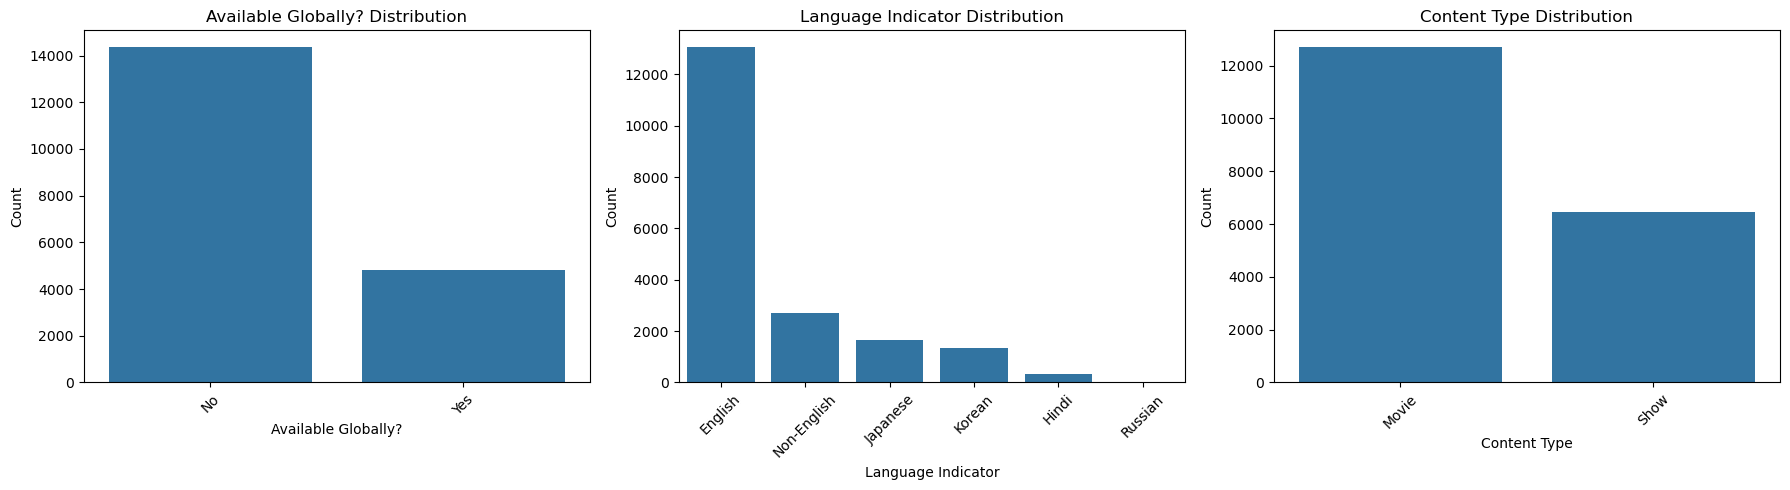


Value counts for Available Globally?:
Available Globally?
No     14361
Yes     4797
Name: count, dtype: int64

Value counts for Language Indicator:
Language Indicator
English        13058
Non-English     2712
Japanese        1673
Korean          1346
Hindi            334
Russian           35
Name: count, dtype: int64

Value counts for Content Type:
Content Type
Movie    12702
Show      6456
Name: count, dtype: int64


In [58]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

categorical_cols = ['Available Globally?', 'Language Indicator', 'Content Type']

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Print value counts after the plots
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

### Hours Viewed Distribution

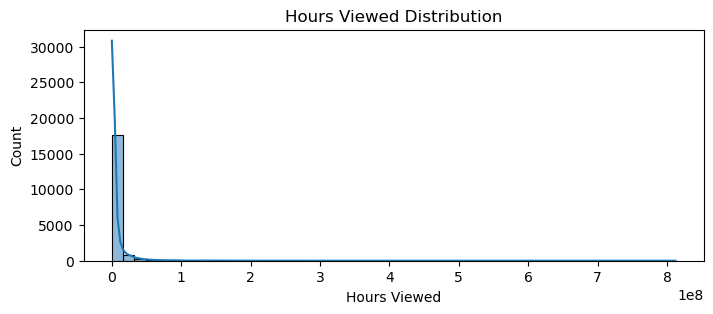

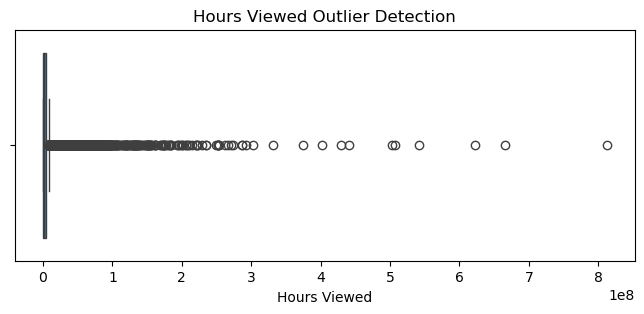

In [59]:
plt.figure(figsize=(8, 3))
sns.histplot(df['Hours Viewed'], bins=50, kde=True)
plt.title("Hours Viewed Distribution")
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Hours Viewed'])
plt.title("Hours Viewed Outlier Detection")
plt.show()

### Hours Viewed by Content Type

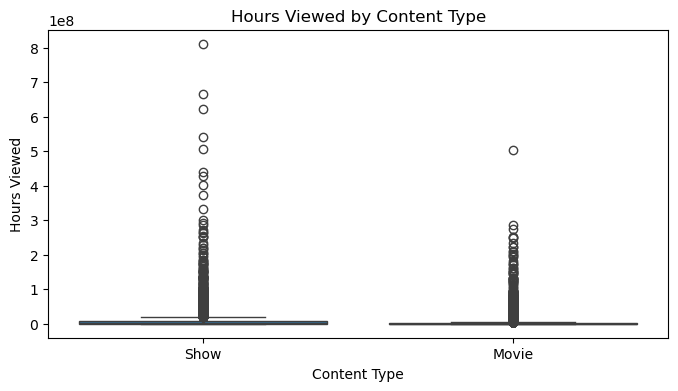

In [60]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Content Type', y='Hours Viewed')
plt.title("Hours Viewed by Content Type")
plt.show()

### Hours Viewed Over Time

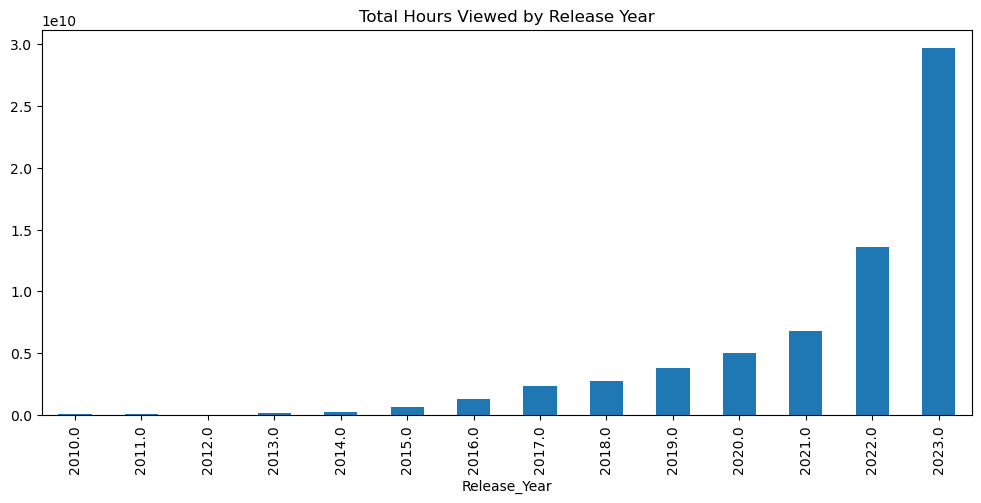

In [61]:
plt.figure(figsize=(12, 5))
df.groupby('Release_Year')['Hours Viewed'].sum().plot(kind='bar')
plt.title("Total Hours Viewed by Release Year")
plt.show()

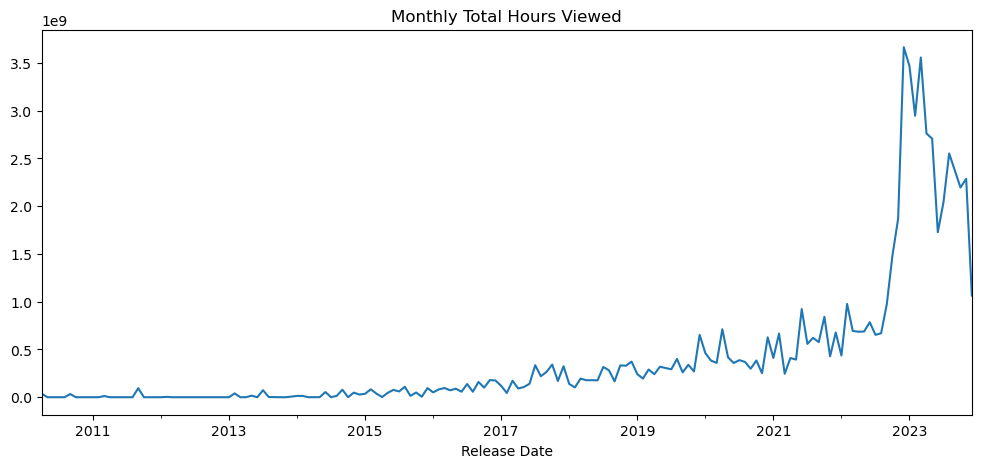

In [63]:
#monthly Trend
if df['Release Date'].notnull().any():
    monthly_views = df.groupby(pd.Grouper(key='Release Date', freq='M'))['Hours Viewed'].sum()
    monthly_views.plot(figsize=(12, 5))
    plt.title("Monthly Total Hours Viewed")
    plt.show()

### Language Analysis

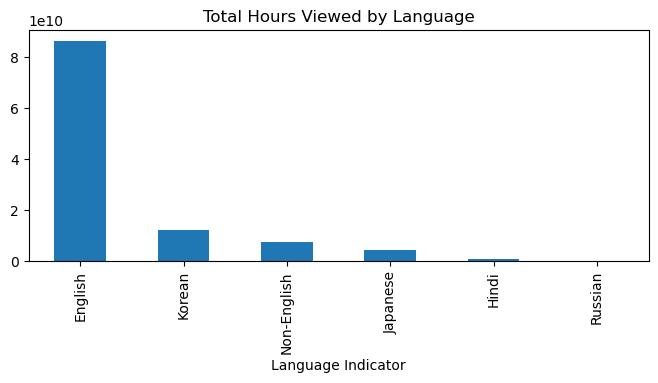

In [64]:
lang_hours = df.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 3))
lang_hours.plot(kind='bar')
plt.title("Total Hours Viewed by Language")
plt.show()

### Top performing Content


===== Top 20 Content by Hours Viewed =====
                                                   Title Content Type  \
0                              The Night Agent: Season 1         Show   
1                              Ginny & Georgia: Season 2         Show   
2                     The Glory: Season 1 // 더 글로리: 시즌 1         Show   
18214                                ONE PIECE: Season 1         Show   
3                                    Wednesday: Season 1         Show   
4                    Queen Charlotte: A Bridgerton Story        Movie   
5                                          You: Season 4         Show   
6                             La Reina del Sur: Season 3         Show   
7                                  Outer Banks: Season 3         Show   
18219                            Sex Education: Season 4         Show   
18222                             Virgin River: Season 5         Show   
8                              Ginny & Georgia: Season 1         Show   
18223  

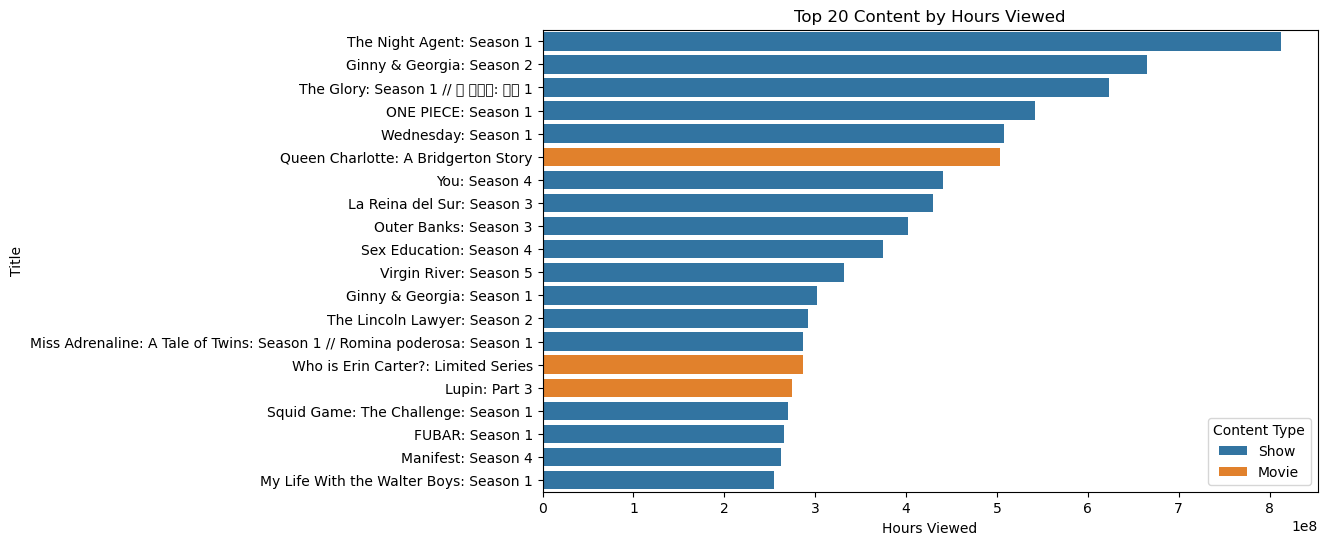

In [65]:
top_20 = df.sort_values(by='Hours Viewed', ascending=False).head(20)
print("\n===== Top 20 Content by Hours Viewed =====")
print(top_20[['Title', 'Content Type', 'Hours Viewed', 'Language Indicator']])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_20, x='Hours Viewed', y='Title', hue='Content Type', dodge=False)
plt.title("Top 20 Content by Hours Viewed")
plt.show()

### Availability vs Hours viewed

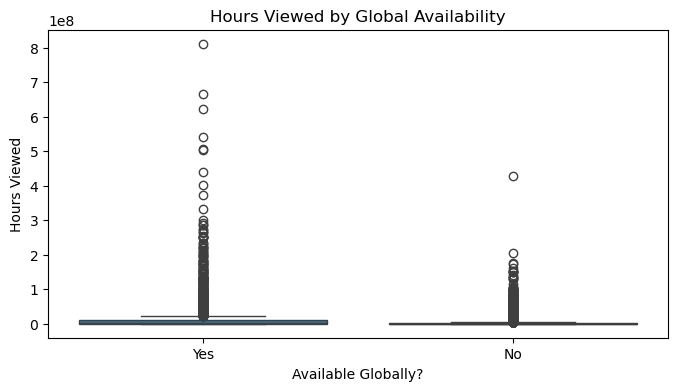

In [66]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Available Globally?', y='Hours Viewed')
plt.title("Hours Viewed by Global Availability")
plt.show()

### Correlation Heatmap

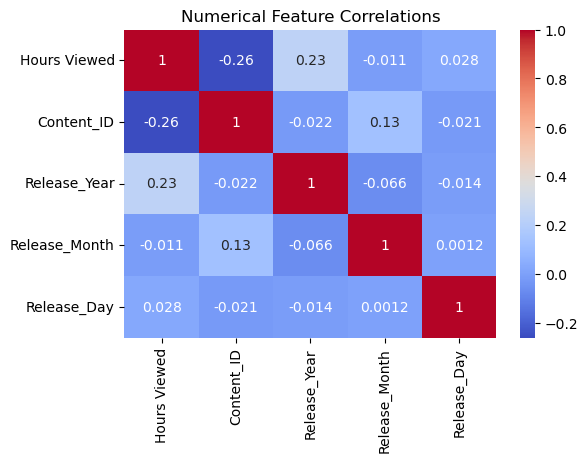

In [67]:
num_cols = df.select_dtypes(include=[np.number])
corr = num_cols.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Numerical Feature Correlations")
plt.show()